In [1]:
import numpy as np

fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

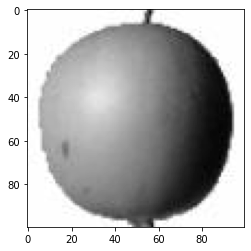

In [2]:
# image 확인
import matplotlib.pyplot as plt
plt.imshow(fruits[0].reshape(100,100),cmap="gray_r")
plt.show()

In [3]:
# target
target = np.concatenate([np.zeros(100),np.ones(100), np.full(100,2)])
# 100개씩 3개 생성
target.shape

(300,)

In [4]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [5]:
train = fruits.reshape(-1,100,100,1) /  255.0

In [6]:
from sklearn.model_selection import train_test_split

trainData, valData, trainTargetData,valTargetData = train_test_split(
    train,target, test_size = 0.2,random_state=42
)
# 학습
trainData2, testData, trainTargetData2,testDataTargetData = train_test_split(
    trainData,trainTargetData, test_size = 0.2,random_state=42
)

---
# CNN 만들기

### 최대풀링, 합성곱층 2번씩 거쳐서

In [7]:
# 합성곱층
from tensorflow import keras

In [8]:
model = keras.Sequential()

2022-07-21 12:58:23.534520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# 1 
# same padding, 같은 사이즈의 특성맵 생성 
model.add(
    keras.layers.Conv2D(
        32, # 필터의 갯수
        kernel_size = 3, # 커널의 갯수 (3*3 => 홀수이여야함)
        activation = "relu",    # 활성함수(가중치를 더하는 방법)
        padding = 'same',
        input_shape = (100,100,1),   # 입력층
    )
)
# 특성맵 사이즈 (100,100,32) # 가로, 세로, 필터 

In [10]:
# 2 
# 최대풀링 (데이터 중 최대값을 택한다.(255에 가장 가까운 값))
model.add(keras.layers.MaxPooling2D(2)) # 2*2

In [11]:
# 합성곱층 2번 
# 3 
# 합성곱층 
model.add(
    keras.layers.Conv2D(
        64, # 필터의 갯수
        kernel_size = 3, # 커널의 갯수 (3*3 => 홀수이여야함)
        activation = "relu",    # 활성함수(가중치를 더하는 방법)
        padding = 'same',
    )
)

In [12]:
# 4 
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))# 2*2

In [13]:
# 쓰는 순서에 따라 모델이 추가되므로 순서에 유의한다.

# 풀링층을 1차원으로 변형 
model.add(keras.layers.Flatten())
# 밀집층 => 은닉층 
model.add(keras.layers.Dense(100,activation="relu"))

# 일부 탈락(과대적합 방지)
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(10,activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dense (Dense)               (None, 100)               4

---
# model complie과 훈련

In [15]:
model.compile(
    optimizer = "adam",
    # 손실함수
    loss = "sparse_categorical_crossentropy", # 출력층은 숫자분류 => 0~9
    metrics = "accuracy"
)
# 손실값이 적은 함수 저장 
checkpoint_db= keras.callbacks.ModelCheckpoint("../Data/fruits_cnn_model.h5")
# 최적의 값을 찾으면 조기 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = model.fit(
    trainData,
    trainTargetData,
    epochs=20,
    validation_data=(valData,valTargetData),
    callbacks = [checkpoint_db,early_stopping_cb]
)

Epoch 1/20
8/8 [==============================] - 4s 456ms/step - loss: 1.2296 - accuracy: 0.4875 - val_loss: 0.3393 - val_accuracy: 0.9000
Epoch 2/20
8/8 [==============================] - 3s 347ms/step - loss: 0.2716 - accuracy: 0.9208 - val_loss: 0.0332 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 4s 524ms/step - loss: 0.0515 - accuracy: 0.9917 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/20
8/8 [==============================] - 8s 1s/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 8s 1s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.1222e-04 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 6s 887ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 2.0674e-04 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 6s 800ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 6.2541e-04 - val_accuracy: 1.0000
Epoch 8/20
8/8

In [16]:
#검증용의 손실과 정확도 
model = keras.models.load_model("../Data/fruits_cnn_model.h5")
model.evaluate(valData,valTargetData)

2/2 [==============================] - 0s 40ms/step - loss: 6.0969e-05 - accuracy: 1.0000


[6.096927245380357e-05, 1.0]

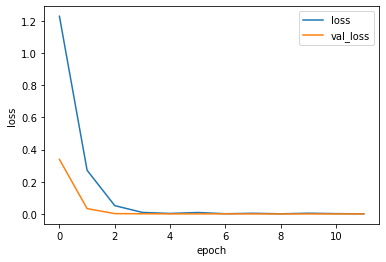

In [17]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

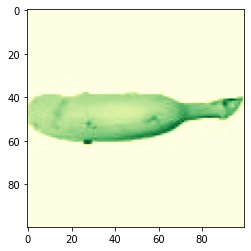

In [18]:
plt.imshow(valData[0].reshape(100,100),cmap="YlGn")
plt.show()

In [19]:
pred = model.predict(valData[0:1])
print(pred)

1/1 [==============================] - 0s 92ms/step
[[6.4624278e-11 1.7419701e-09 1.0000000e+00 5.5179663e-12 3.6321602e-11
  1.1084490e-09 2.1759940e-10 2.3308289e-11 3.6158520e-12 3.3447591e-13]]


In [20]:
import numpy as np
classes = ['바나나','파인애플','사과']

In [21]:
# np.argmax 최대값의 인덱스를 반환
print(classes[np.argmax(pred)])

사과


In [22]:
test_scaled = testData.reshape(-1,100,100,1)

In [23]:
model.evaluate(test_scaled,testDataTargetData)

2/2 [==============================] - 0s 58ms/step - loss: 8.2227e-06 - accuracy: 1.0000


[8.222684300562833e-06, 1.0]